In [2]:
!pip install torch

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached torch-1.13.1-cp37-cp37m-manylinux1_x86_64.whl (887.5 MB)
  Using cached nvidia_cuda_nvrtc_cu11-11.7.99-2-py3-none-manylinux1_x86_64.whl (21.0 MB)
  Using cached nvidia_cudnn_cu11-8.5.0.96-2-py3-none-manylinux1_x86_64.whl (557.1 MB)
  Using cached nvidia_cuda_runtime_cu11-11.7.99-py3-none-manylinux1_x86_64.whl (849 kB)
  Using cached nvidia_cublas_cu11-11.10.3.66-py3-none-manylinux1_x86_64.whl (317.1 MB)


In [3]:
import torch
import pandas as pd

In [4]:
train = pd.read_csv('train.csv', names=["Index", "names"])

In [5]:
texts = train['names'].tolist()

In [6]:
train.shape

(191897, 2)

In [7]:
## Dataset Preprocessing

In [8]:
import glob
import os
import json
import re
from itertools import chain
from string import punctuation
import random

import pandas as pd
import numpy as np

In [9]:
texts[115]

'- _ _ O'

In [10]:
def separation(string):
    cnt = 0
    #rint(len(string))
    for i in range(len(string)):
        if string[i]== '_':
            cnt = cnt +1
   #print(cnt)
        
    if cnt <=2:
        splitted_string = string.split("_")
            #print(len(splitted_string))
    return splitted_string

In [11]:
label = []
names = []
for i in range(len(texts)):
    s = separation(texts[i])
    label.append(s[len(s)-1])
    names.append(s[0])
    

In [12]:
print(len(label))

191897


In [13]:
!pip install transformers

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached transformers-4.25.1-py3-none-any.whl (5.8 MB)
  Using cached huggingface_hub-0.11.1-py3-none-any.whl (182 kB)
  Using cached tokenizers-0.13.2-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.6 MB)
  Using cached packaging-23.0-py3-none-any.whl (42 kB)
  Attempting uninstall: packaging
    Found existing installation: packaging 20.1
    Uninstalling packaging-20.1:
      Successfully uninstalled packaging-20.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytest-astropy 0.8.0 requires pytest-cov>=2.0, which is not installed.
pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.
sagemaker 2.120.0 requires importlib-metadata<5.0,>=1.4.0, but you have importlib-metadata 5.1.0 which is incompatible.
docker-compose 1.29.2 requires PyYAML<6,>=3.10, b

In [14]:
from tqdm import tqdm, trange
import pandas as pd

In [15]:
df1 = pd.DataFrame(names)

In [16]:
df2 = pd.DataFrame(label)

In [17]:
 pd.concat([pd.concat([df1, df2], axis=1)]).to_csv('train_final.csv')

In [18]:
train_final = pd.read_csv('train_final.csv', names=["text", "label"] )

In [19]:
train_final

,text,label
NaN,0,0
0.0,তার,O
1.0,মৃত্যুর,O
2.0,দশ,O
3.0,দিন,O
...,...,...
191892.0,প্রথম,O
191893.0,দরগৌদ,B-CORP
191894.0,দ্বারা,O
191895.0,প্রকাশিত,O


In [20]:
import os
import json
import csv

In [21]:
## sentence generation

In [22]:
with open('train.txt', 'r') as f:
    data = f.read().replace('\n\n','#')

data = data.replace('\n',',')
string = data
words = string.split('#')

print(words[0])

তার _ _ O,মৃত্যুর _ _ O,দশ _ _ O,দিন _ _ O,পর, _ _ O,১১৫ _ _ O,কৃষ্ণাঙ্গ _ _ O,উচ্চ _ _ O,বিদ্যালয়ের _ _ O,শিক্ষার্থীরা _ _ O,তার _ _ O,হত্যার _ _ O,প্রতিবাদে _ _ O,ম্যাককম্ব _ _ B-LOC,এর _ _ O,মাধ্যমে _ _ O,মিছিল _ _ O,করেছে। _ _ O


In [23]:
AllSentences=[]
for sent in words:
    AllSentences.append(sent)

In [24]:
def splitter(Sentence):
        splittedText = Sentence.split('_')
        return (splittedText)

In [25]:
splitter("তার _ _ O")


['তার ', ' ', ' O']

In [26]:
AllText = []
AllLab = []
for sentence in AllSentences:
    TextEntry = sentence.split(',')
    SingleSent =[]
    SingleLab=[]
    for text in TextEntry:
        output =  splitter(text) 
        if(output[0]!=' '):
            SingleSent.append(output[0])
        if(len(output)>1):
            SingleLab.append(output[-1])
    AllText.append(SingleSent)
    AllLab.append(SingleLab)

In [27]:
len(AllText)
len(AllLab)
AllText[0]

['তার ',
 'মৃত্যুর ',
 'দশ ',
 'দিন ',
 'পর',
 '১১৫ ',
 'কৃষ্ণাঙ্গ ',
 'উচ্চ ',
 'বিদ্যালয়ের ',
 'শিক্ষার্থীরা ',
 'তার ',
 'হত্যার ',
 'প্রতিবাদে ',
 'ম্যাককম্ব ',
 'এর ',
 'মাধ্যমে ',
 'মিছিল ',
 'করেছে। ']

In [28]:
## build the model

In [29]:
!pip install keras

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)


In [30]:
!pip install tensorflow

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached tensorflow-2.11.0-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (588.3 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached flatbuffers-23.1.4-py2.py3-none-any.whl (26 kB)
  Using cached grpcio-1.51.1-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.8 MB)
  Using cached tensorflow_estimator-2.11.0-py2.py3-none-any.whl (439 kB)
  Using cached protobuf-3.19.6-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached termcolor-2.2.0-py3-none-any.whl (6.6 kB)
  Using cached tensorflow_io_gcs_filesystem-0.29.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (2.4 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorboard-2.11.2-py3-none-any.whl (6.0 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached libclang-15.0.6.1-py2.py3-none-man

In [31]:
!pip install keras-preprocessing

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)


In [32]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertConfig

from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

torch.__version__

'1.13.1+cu117'

In [33]:
tag_values = list(set(train_final["label"].values))
tag_values.append("PAD")
tag2idx = {t: i for i, t in enumerate(tag_values)}

In [34]:
MAX_LEN = 75
bs = 32

In [35]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()

In [36]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=False) 
#cased better for for ner

In [37]:
def tokenize_and_preserve_labels(sentence, text_labels):
    tokenized_sentence = []
    labels = []

    for word, label in zip(sentence, text_labels):

        # Tokenize the word and count # of subwords the word is broken into
        tokenized_word = tokenizer.tokenize(word)
        n_subwords = len(tokenized_word)

        # Add the tokenized word to the final tokenized word list
        tokenized_sentence.extend(tokenized_word)

        # Add the same label to the new list of labels `n_subwords` times
        labels.extend([label] * n_subwords)

    return tokenized_sentence, labels

In [38]:
tokenized_texts_and_labels = [
    tokenize_and_preserve_labels(sent, labs)
    for sent, labs in zip(AllText, AllLab)
]

In [39]:
tokenized_texts = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels]
labels = [token_label_pair[1] for token_label_pair in tokenized_texts_and_labels]

In [40]:
#cut and pad to the desied length 75 bcz ab no of token increase ho gya
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=MAX_LEN, dtype="long", value=0.0,
                          truncating="post", padding="post")

In [41]:
tags = pad_sequences([[tag2idx.get(l) for l in lab] for lab in labels],
                     maxlen=MAX_LEN, value=tag2idx["PAD"], padding="post",
                     dtype="long", truncating="post")

In [42]:
attention_masks = [[float(i != 0.0) for i in ii] for ii in input_ids]


In [43]:
tr_inputs, val_inputs, tr_tags, val_tags = train_test_split(input_ids, tags,
                                                            random_state=2018, test_size=0.1)
tr_masks, val_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)

In [44]:
# convert to torch tenors
tr_inputs = torch.tensor(tr_inputs)
val_inputs = torch.tensor(val_inputs)
tr_tags = torch.tensor(tr_tags)
val_tags = torch.tensor(val_tags)
tr_masks = torch.tensor(tr_masks)
val_masks = torch.tensor(val_masks)

In [45]:
#training time shuffling of the data and testing time we pass them sequentially
train_data = TensorDataset(tr_inputs, tr_masks, tr_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=bs)

valid_data = TensorDataset(val_inputs, val_masks, val_tags)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=bs)

In [46]:
import transformers
from transformers import BertForTokenClassification, AdamW

transformers.__version__

'4.25.1'

In [47]:
model = BertForTokenClassification.from_pretrained(
    "bert-base-cased",
    num_labels=len(tag2idx),
    output_attentions = False,
    output_hidden_states = False
)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForTokenClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-cas

In [48]:
FULL_FINETUNING = True
if FULL_FINETUNING:
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.0}
    ]
else:
    param_optimizer = list(model.classifier.named_parameters())
    optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

optimizer = AdamW(
    optimizer_grouped_parameters,
    lr=3e-5,
    eps=1e-8
)

/opt/conda/lib/python3.7/site-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


In [49]:
#schduler to reduce learning rate linearly throughout the epochs
from transformers import get_linear_schedule_with_warmup

epochs = 3
max_grad_norm = 1.0

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

In [50]:
!pip install seqeval

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached seqeval-1.2.2-py3-none-any.whl


In [51]:
from seqeval.metrics import f1_score
from sklearn.metrics import f1_score

def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=2).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [55]:
## Store the average loss after each epoch so we can plot them.
loss_values, validation_loss_values = [], []

for _ in range(epochs):
    # ========================================
    #               Training
    # ========================================
    # Perform one full pass over the training set.

    # Put the model into training mode.
    model.train()
    print("hello")
    # Reset the total loss for this epoch.
    total_loss = 0

    # Training loop
    for step, batch in enumerate(train_dataloader):
        # add batch to gpu
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        # Always clear any previously calculated gradients before performing a backward pass.
        model.zero_grad()
        # forward pass
        # This will return the loss (rather than the model output)
        # because we have provided the `labels`.
        print("hello2")
        outputs = model(b_input_ids, token_type_ids=None,
                        attention_mask=b_input_mask, labels=b_labels)
        # get the loss
        loss = outputs[0]
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # track train loss
        total_loss += loss.item()
        # Clip the norm of the gradient
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(parameters=model.parameters(), max_norm=max_grad_norm)
        # update parameters
        optimizer.step()
        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data
    print("Hello3")
    avg_train_loss = total_loss / len(train_dataloader)
    print("Average train loss: {}".format(avg_train_loss))

    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)
    
    model.eval()
    # Reset the validation loss for this epoch.
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    predictions , true_labels = [], []
    for batch in valid_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        # Telling the model not to compute or store gradients,
        # saving memory and speeding up validation
        with torch.no_grad():
            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have not provided labels.
            outputs = model(b_input_ids, token_type_ids=None,
                            attention_mask=b_input_mask, labels=b_labels)
        # Move logits and labels to CPU
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        eval_loss += outputs[0].mean().item()
        eval_accuracy += flat_accuracy(logits, label_ids)
        predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
        true_labels.extend(label_ids)

        nb_eval_examples += b_input_ids.size(0)
        nb_eval_steps += 1

    eval_loss = eval_loss / nb_eval_steps
    validation_loss_values.append(eval_loss)
    print("Validation loss: {}".format(eval_loss))
    print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))
    pred_tags = [[tag_values[p_i] for p, l in zip(predictions, true_labels)
                                 for p_i, l_i in zip(p, l) if tag_values[l_i] != "PAD"]]
    valid_tags = [[tag_values[l_i] for l in true_labels
                                  for l_i in l if tag_values[l_i] != "PAD"]]
    print("Validation F1-Score: {}".format(f1_score(pred_tags, valid_tags)))
    print()

hello
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2


/opt/conda/lib/python3.7/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning:  O seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/opt/conda/lib/python3.7/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning:  B-PROD seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/opt/conda/lib/python3.7/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning:  I-CORP seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/opt/conda/lib/python3.7/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning:  I-PER seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/opt/conda/lib/python3.7/site-packages/seqeval/metrics/sequence_labeling.py:171: UserWarning:  B-CORP seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
/opt/conda/lib/python3.7/site-packages/seqeval/metrics/sequence_labeling.py:

Validation F1-Score: 0.24162639560073323

hello
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2
hello2


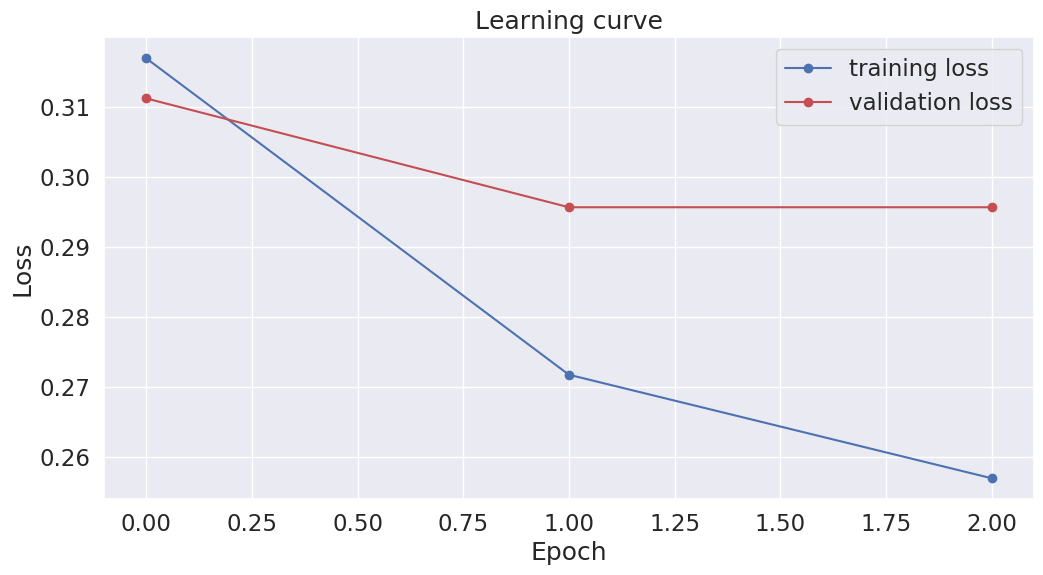

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o', label="training loss")
plt.plot(validation_loss_values, 'r-o', label="validation loss")
# Label the plot.
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [98]:
!git clone https://github.com/cryptexcode/nlp_hackathon_bd_2023

fatal: destination path 'nlp_hackathon_bd_2023' already exists and is not an empty directory.


In [119]:
  #aa = ' '.join(aa)
    
with open('New Text Document.txt', 'r') as f:
    testdata = f.read()

In [120]:
doc = testdata.replace('\n', ' ')

In [121]:
sentence = doc.split('  ')
print(len(sentence))

13215


In [126]:
Label =[]

In [140]:
for each in sentence[10000:-1]:
    tokenized_sentence = tokenizer.encode(each)
    input_ids = torch.tensor([tokenized_sentence])
    
    with torch.no_grad():
        output = model(input_ids)
        label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)

        tokens = tokenizer.convert_ids_to_tokens(input_ids.to('cpu').numpy()[0])
        new_tokens, new_labels = [], []
        for token, label_idx in zip(tokens, label_indices[0]):
            if token.startswith("##"):
                new_tokens[-1] = new_tokens[-1] + token[2:]
            else:
                new_labels.append(tag_values[label_idx])
                new_tokens.append(token)
    for token, label in zip(new_tokens, new_labels):
        Label.append(label)
        Label.append('\n\n')

In [141]:
len(Label)

394720

In [157]:
with open("file.txt", "w") as output:
    output.write(str(aa))

In [151]:
aa = ' '.join(Label)

In [110]:
print("{}\t{}".format(label, token))

 O	[CLS]
 O	এটি
 O	ব্যাখ্যা
 O	করে
 O	যে
 O	কেন
 O	একটি
 O	[UNK]
 O	[UNK]
 O	[UNK]
 O	একই
 O	আকারের
 O	প্রিমিয়াম
 O	[UNK]
 O	স্পিরিট
 O	বোতলটির
 O	সাথে
 O	তুলনা
 O	করার
 O	সময়
 O	খুব
 O	ব্যয়বহুল
 O	হিসাবে
 O	দেখা
 O	যেতে
 O	পারে
 O	।
 O	ওয়ালমার্ট
 O	[UNK]
 O	[UNK]
 O	[SEP]


In [155]:
for i in range(len(Label)):
    Label[i]= Label[i].replace(' ','')

In [156]:
Label[2]

'O'